In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("C:/Users/shruti/OneDrive/Desktop/ml lab/Mall_Customers.csv")
data.head()

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Visualize raw data
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='gray')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

In [ ]:
K = 5
Centroids = X.sample(n=K).reset_index(drop=True)

diff = 1
j = 0

while diff != 0:
    XD = X.copy()
    distance_matrix = []

    for _, row_c in Centroids.iterrows():
        ED = []
        for _, row_d in XD.iterrows():
            d1 = (row_c["Annual Income (k$)"] - row_d["Annual Income (k$)"])**2
            d2 = (row_c["Spending Score (1-100)"] - row_d["Spending Score (1-100)"])**2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        distance_matrix.append(ED)


In [ ]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Income vs Spending Score')
plt.show()

In [ ]:
K = 5
Centroids = X.sample(n=K).reset_index(drop=True)

diff = 1
j = 0

while diff != 0:
    XD = X.copy()
    distance_matrix = []

    for _, row_c in Centroids.iterrows():
        ED = []
        for _, row_d in XD.iterrows():
            d1 = (row_c["Annual Income (k$)"] - row_d["Annual Income (k$)"])**2
            d2 = (row_c["Spending Score (1-100)"] - row_d["Spending Score (1-100)"])**2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        distance_matrix.append(ED)

    # Assign distances to X
    for i in range(K):
        X[f"Distance_{i}"] = distance_matrix[i]

    # Assign clusters
    C = []
    for _, row in X.iterrows():
        distances = [row[f"Distance_{i}"] for i in range(K)]
        pos = np.argmin(distances) + 1
        C.append(pos)

    X["Cluster"] = C

    # Compute new centroids
    Centroids_new = X.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().reset_index(drop=True)

    if j == 0:
        diff = 1
        j += 1
    else:
        diff = np.sum(np.abs(Centroids_new["Annual Income (k$)"] - Centroids["Annual Income (k$)"])) + \
               np.sum(np.abs(Centroids_new["Spending Score (1-100)"] - Centroids["Spending Score (1-100)"]))
        print("Centroid shift:", diff)

    Centroids = Centroids_new.copy()

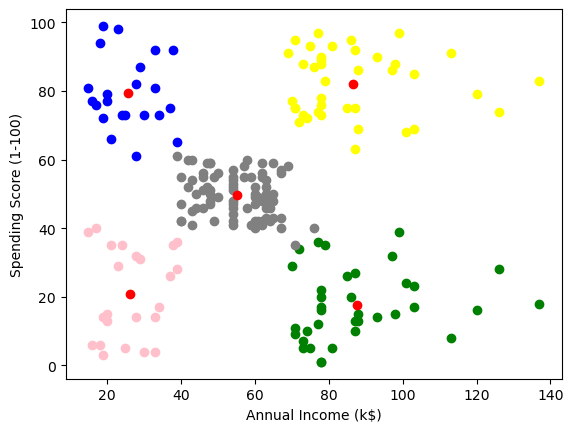

In [61]:

import matplotlib.pyplot as plt
color = ['green', 'blue', 'pink','grey','yellow']
for k in range(K):
    cluster_data = X[X["Cluster"] == k + 1]
    plt.scatter(cluster_data["Annual Income (k$)"], cluster_data["Spending Score (1-100)"], c=color[k])
plt.scatter(Centroids["Annual Income (k$)"], Centroids["Spending Score (1-100)"], c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()